In [32]:
import pandas as pd
from data_cleaning import merge_data

merged_df = merge_data()
merged_df.treatment.unique()

array(['Yes', 'No', 'Not applicable to me', 'Sometimes', 'Often',
       'Rarely', 'Never'], dtype=object)

In [26]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import tree

data = merged_df[['Age', 'Country', 'self_employed', 'family_history', 'no_employees', 'tech_company', 'wellness_program', 'treatment']].dropna()
features = data.loc[:, data.columns != 'treatment']
features = pd.get_dummies(features)
labels = data['treatment']

X_train, X_test, Y_train, Y_test = \
    train_test_split(features, labels, test_size=0.2)
    
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, Y_train)

# Print accuracy
test_predictions = clf.predict(X_test)
print('Test  Accuracy:', accuracy_score(Y_test, test_predictions))


Test  Accuracy: 0.5620608899297423


In [27]:
# Create an untrained model
short_clf = tree.DecisionTreeClassifier(max_depth=3)

# Train it on the **training set**
short_clf.fit(X_train, Y_train)

# Print accuracy
test_predictions = short_clf.predict(X_test)
print('Test  Accuracy:', accuracy_score(Y_test, test_predictions))

Test  Accuracy: 0.6955503512880562


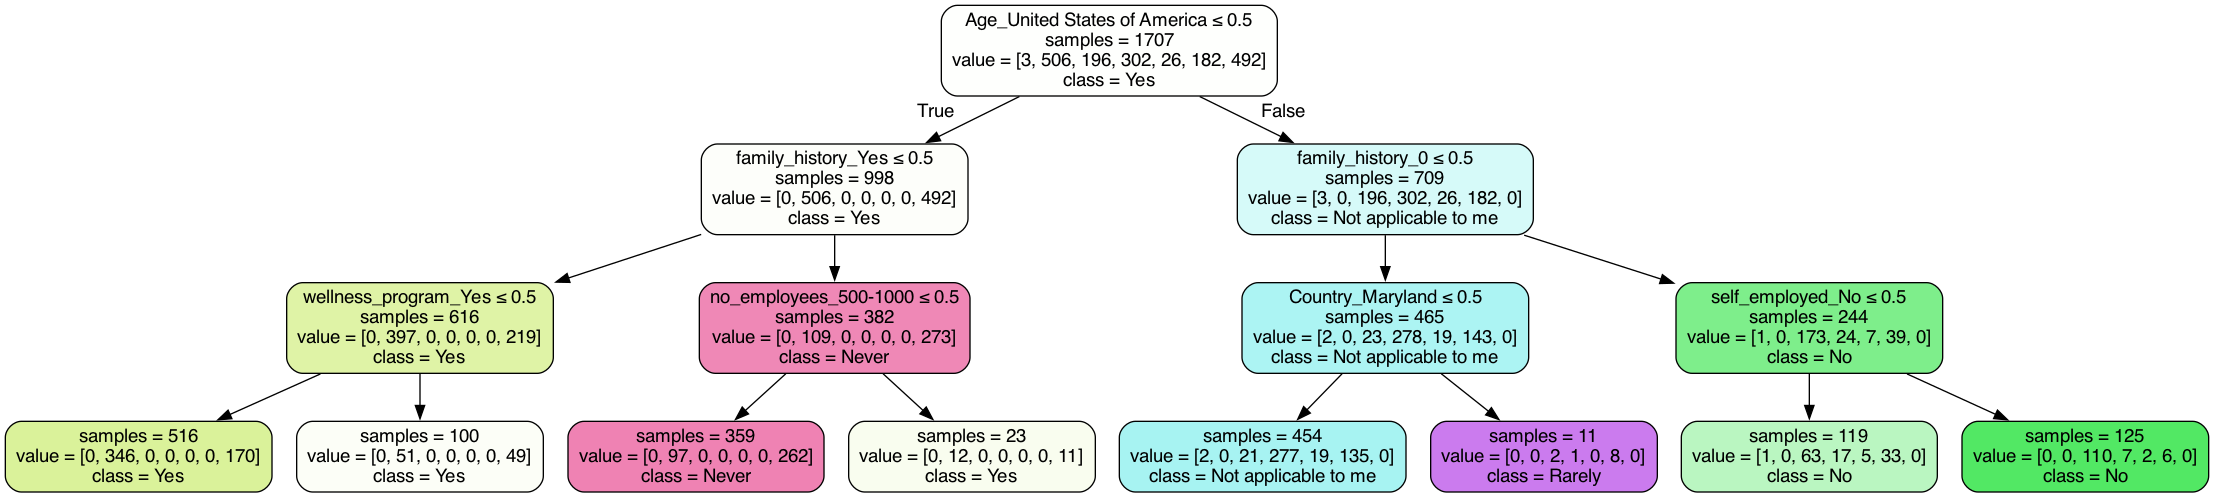

In [28]:
from IPython.display import Image, display

import graphviz 
from sklearn.tree import export_graphviz


def plot_tree(model, features, labels):
    dot_data = export_graphviz(model, out_file=None, 
            feature_names=features.columns,  
            class_names=labels.unique(),
            impurity=False,
            filled=True, rounded=True,  
            special_characters=True) 
    graphviz.Source(dot_data).render('tree.gv', format='png')
    display(Image(filename='tree.gv.png'))

# Import 
plot_tree(short_clf, X_train, Y_train)